# Retail Space Analysis Project

In [558]:
# Importing Python libraries

import pandas as pd
from pandasql import sqldf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Setting the output decimal to 3 places

# pd.set_option('display.precision',2) 
pd.set_option('display.float_format', lambda x: '%.3f' % x) # can view non-scientic numbers in output

In [488]:
# Defining a function called pysqldf to make it easier to run SQL queries  
# and view results without writing entire syntax every time

pysqldf = lambda q: sqldf(q, globals())

## Data Wrangling

In [489]:
# Reading CSV dataset into Pandas dataframe

retail_df = pd.read_csv("data/retail_space_dataset_2019.csv")

In [490]:
# Viewing first 10 rows of dataframe

retail_df.head(5)

,Location number,Month,State,Gross revenue,Fixed cost,Variable cost,Rental cost,Number of products,Owned
0,1,1,TX,48628171.020,9218156.690,24278189.230,365880,4452,False
1,1,2,TX,48107179.240,10587747.350,25116844.410,365880,4452,False
2,1,3,TX,64352278.290,10193873.770,33703499.830,365880,4452,False
3,1,4,TX,45943677.960,8764165.000,24037719.470,365880,4452,False
4,1,5,TX,32761434.980,8022116.430,16432119.180,365880,4452,False


In [491]:
# Renaming column names of raw dataset so can be easily used in SQL queries if needed

retail_df.columns = ['location_num', 'month', 'state', 'gross_rev', 'fixed_cost', 'variable_cost', 'rental_cost', 'num_of_prod', 'owned']

In [492]:
# Converting boolean field Owned to Integer

retail_df.owned = retail_df.owned.astype(int)
retail_df.head(5)

,location_num,month,state,gross_rev,fixed_cost,variable_cost,rental_cost,num_of_prod,owned
0,1,1,TX,48628171.020,9218156.690,24278189.230,365880,4452,0
1,1,2,TX,48107179.240,10587747.350,25116844.410,365880,4452,0
2,1,3,TX,64352278.290,10193873.770,33703499.830,365880,4452,0
3,1,4,TX,45943677.960,8764165.000,24037719.470,365880,4452,0
4,1,5,TX,32761434.980,8022116.430,16432119.180,365880,4452,0


In [493]:
# Running SQL query to view top 5 records of dataset

print(pysqldf("SELECT * FROM retail_df LIMIT 100").head(5))

   location_num  month state    gross_rev   fixed_cost  variable_cost  \
0             1      1    TX 48628171.020  9218156.690   24278189.230   
1             1      2    TX 48107179.240 10587747.350   25116844.410   
2             1      3    TX 64352278.290 10193873.770   33703499.830   
3             1      4    TX 45943677.960  8764165.000   24037719.470   
4             1      5    TX 32761434.980  8022116.430   16432119.180   

   rental_cost  num_of_prod  owned  
0       365880         4452      0  
1       365880         4452      0  
2       365880         4452      0  
3       365880         4452      0  
4       365880         4452      0  


## Part 1 - Summary Statistics and Plots

### 1) Looking across all locations, calculate the mean and median annual profit margin of a typical store. Does the profit margin across locations appear normally distributed? Please visualize.

In [494]:
# Calculating Profit Margin as Gross Revenue - Fixed Cost - Variable Cost - Rental Cost

retail_df['profit'] = retail_df['gross_rev'] - retail_df['fixed_cost'] - retail_df['variable_cost'] - retail_df['rental_cost']
retail_df.head(5)

,location_num,month,state,gross_rev,fixed_cost,variable_cost,rental_cost,num_of_prod,owned,profit
0,1,1,TX,48628171.020,9218156.690,24278189.230,365880,4452,0,14765945.100
1,1,2,TX,48107179.240,10587747.350,25116844.410,365880,4452,0,12036707.480
2,1,3,TX,64352278.290,10193873.770,33703499.830,365880,4452,0,20089024.690
3,1,4,TX,45943677.960,8764165.000,24037719.470,365880,4452,0,12775913.490
4,1,5,TX,32761434.980,8022116.430,16432119.180,365880,4452,0,7941319.370


In [495]:
# Using describe function to view stats of raw dataset

retail_df.describe()

,location_num,month,gross_rev,fixed_cost,variable_cost,rental_cost,num_of_prod,owned,profit
count,3996.000,3996.000,3996.000,3996.000,3996.000,3996.000,3996.000,3996.000,3996.000
mean,167.000,6.500,30091813.399,6248363.348,15741274.667,147721.231,4510.979,0.108,7954454.152
std,96.140,3.452,16563743.098,2745097.051,8587853.641,112552.593,135.178,0.311,5806777.236
min,1.000,1.000,3307785.286,574331.810,1644293.780,0.000,3810.000,0.000,-7668159.830
25%,84.000,3.750,18828097.705,4471979.438,9915176.515,73940.000,4431.000,0.000,3966817.045
50%,167.000,6.500,26314156.120,5618381.580,13700273.115,130970.000,4527.000,0.000,6748051.555
75%,250.000,9.250,37271728.935,7246045.622,19206266.438,195840.000,4594.000,0.000,10463479.845
max,333.000,12.000,118458181.300,23060518.510,59314880.570,689750.000,4789.000,1.000,43228289.540


In [496]:
# Calculating Mean of Profit by Location number

profit_mean = retail_df.groupby(['location_num']).mean()[['profit']]
profit_mean.head(5)

,profit
location_num,
1,12507001.504
2,7382226.997
3,6887181.659
4,4578624.067
5,3300148.209


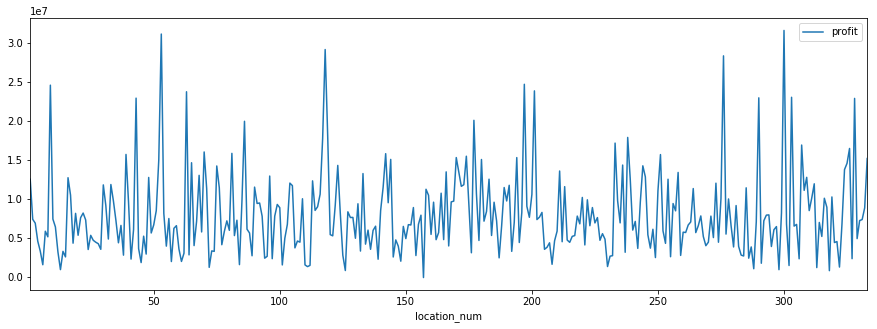

In [511]:
# Visualizing Mean of Profit  

# profit_mean.hist(figsize=(15,5))
# plt.show()
profit_mean.plot(figsize=(15,5), kind='line')

In [727]:
# Mean annual profit margin of a typical store

profit_mean.mean()

profit   7954454.152
dtype: float64

In [498]:
# Calculating Median of Profit by Location number

profit_median = retail_df.groupby(['location_num']).median()[['profit']]
profit_median.head(5)

,profit
location_num,
1,12406310.485
2,6810855.650
3,7159084.610
4,4262322.055
5,3502487.570


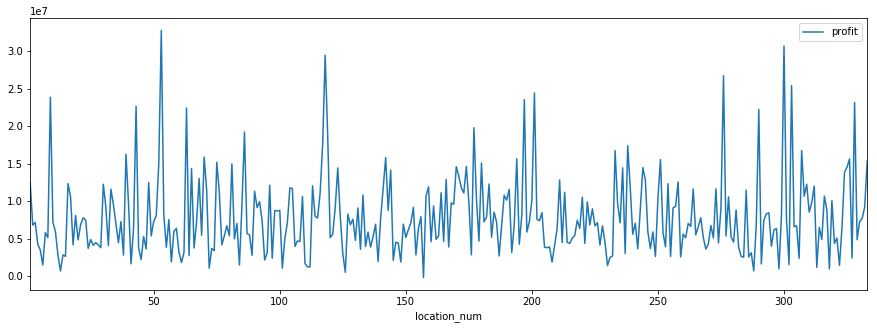

In [512]:
# Visualizing Median of Profit  

# profit_median.hist(figsize=(15,5))
# plt.show() 
profit_median.plot(figsize=(15,5), kind='line')

In [728]:
# Median annual profit margin of a typical store

profit_median.median()

profit   6815561.145
dtype: float64

In [529]:
# Aggregating Profit by Location number

profit = retail_df.groupby(['location_num']).sum()[['profit']]
profit.head(5)

,profit
location_num,
1,150084018.050
2,88586723.970
3,82646179.910
4,54943488.800
5,39601778.510


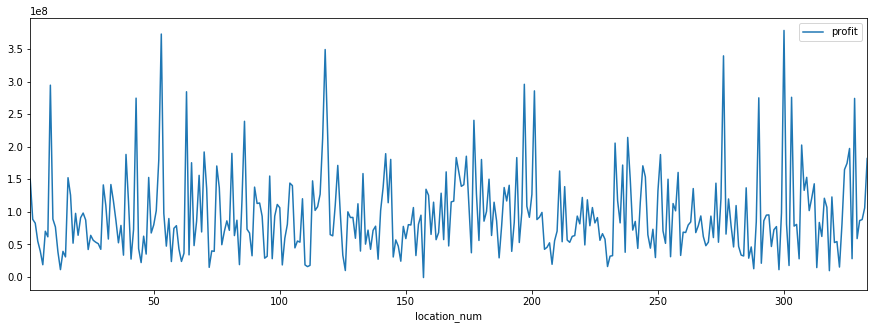

In [531]:
# Visualizing Profit by Location Number  

profit.plot(figsize=(15,5), kind='line')

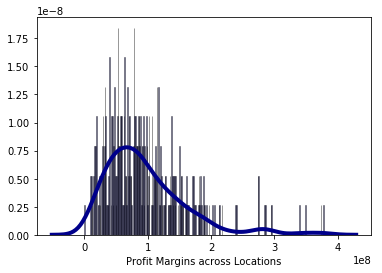

In [551]:
# Visualizaing Profit Margins Across Locations in a Distribution Plot

sns.distplot(profit['profit'], hist=True, kde=True, 
             bins=int(333), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, 
             axlabel='Profit Margins across Locations')

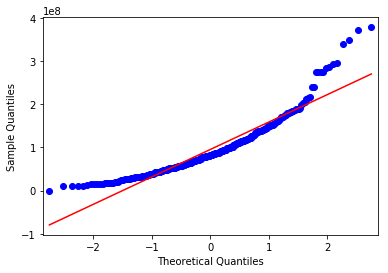

In [723]:
# QQ Plot Imports
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

# Creating subset for prodit margins across locations and storing it in pf
pf = pysqldf("SELECT location_num, SUM(profit) AS profit FROM retail_df GROUP BY location_num")

# q-q plot
qqplot(pf['profit'], line='s')
pyplot.show()

# # q-q plot
# qqplot(profit['profit'], line='s')
# pyplot.show()

The Shapiro-Wilk Test will return two things:

Statistic: A quantity calculated by the test that can be interpreted in the context of the test via comparing it to critical values from the distribution of the test statistic.

p-value: Used to interpret the test - each test calculates a test-specific statistic. The p-value can be used to quickly and accurately interpret the statistic in this application.

The tests assume that that the sample was drawn from a Gaussian distribution. Technically this is called the null hypothesis, or H0. A threshold level is chosen called alpha, 5% (or 0.05), that is used to interpret the p-value.

p <= alpha: reject H0, not normal.
p > alpha: fail to reject H0, normal.
This means that, in general, we are seeking results with a larger p-value to confirm that our sample was likely drawn from a Gaussian distribution.

In [724]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

# normality test
stat, p = shapiro(pf['profit'])

print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.882, p=0.000
Sample does not look Gaussian (reject H0)


This proves that the Profit Margin is not Normally Distributed.

### 2) Please plot the monthly and quarterly aggregate revenue across all stores.

In [554]:
# This definition buckets months into quarters - kept it numeric for running models later on

def quarter(t):
    '''Defining function that buckets months into quarters'''
    if (t['month'] >= 1) and (t['month'] <= 3):
        return 1
    elif (t['month'] >= 4) and (t['month'] <= 6):
        return 2
    elif (t['month'] >= 7) and (t['month'] <= 9):
        return 3
    elif (t['month'] >= 10) and (t['month'] <= 12):
        return 4
    else:
        return 0

In [555]:
retail_df['quarter'] = retail_df.apply(quarter, axis=1)
retail_df.head(5)

,location_num,month,state,gross_rev,fixed_cost,variable_cost,rental_cost,num_of_prod,owned,profit,quarter
0,1,1,TX,48628171.020,9218156.690,24278189.230,365880,4452,0,14765945.100,1
1,1,2,TX,48107179.240,10587747.350,25116844.410,365880,4452,0,12036707.480,1
2,1,3,TX,64352278.290,10193873.770,33703499.830,365880,4452,0,20089024.690,1
3,1,4,TX,45943677.960,8764165.000,24037719.470,365880,4452,0,12775913.490,2
4,1,5,TX,32761434.980,8022116.430,16432119.180,365880,4452,0,7941319.370,2


In [556]:
# Checking if bucketing of new field results are as expected

print(pysqldf("SELECT DISTINCT month, quarter FROM retail_df"))

    month  quarter
0       1        1
1       2        1
2       3        1
3       4        2
4       5        2
5       6        2
6       7        3
7       8        3
8       9        3
9      10        4
10     11        4
11     12        4


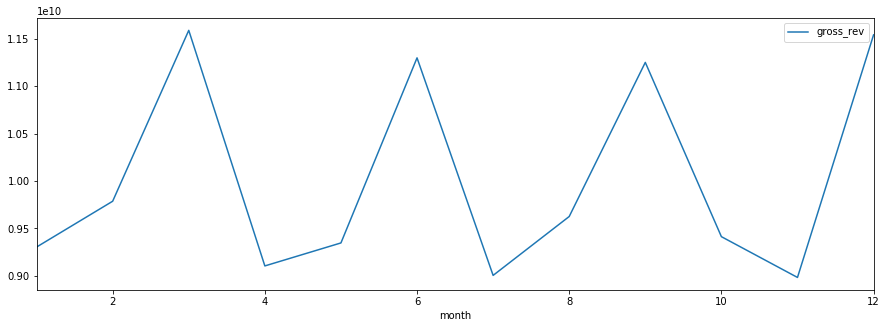

In [730]:
# Aggregating Revenue over Months and Visualizing the results

monthly_rev = retail_df.groupby(['month'], as_index=True).sum()[['gross_rev']]
monthly_rev
monthly_rev.plot(kind='line', figsize=(15,5))

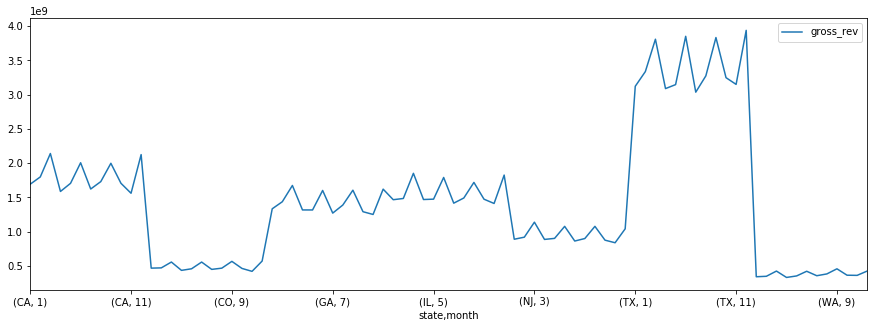

In [735]:
# Aggregating Revenue by Location Number and Month, and Visualizing the results

monthly_rev_loc = retail_df.groupby(['state', 'month'], as_index=True).sum()[['gross_rev']]
monthly_rev_loc
monthly_rev_loc.plot(kind='line', figsize=(15,5))

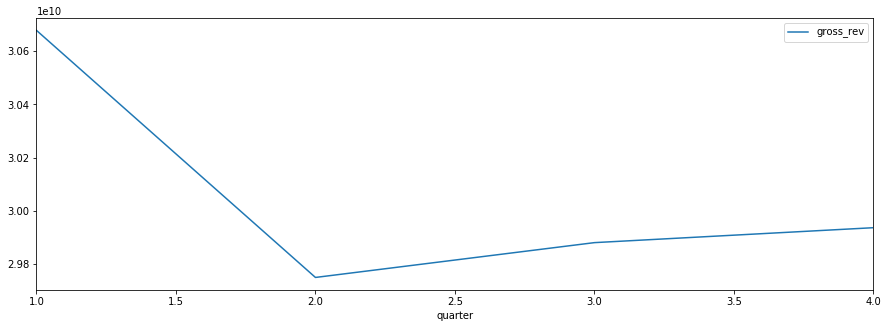

In [732]:
# Aggregating Revenue over Quarters and Visualizing the results

quarterly_rev = retail_df.groupby(['quarter'], as_index=True).sum()[['gross_rev']]
quarterly_rev
quarterly_rev.plot(kind='line', figsize=(15,5))

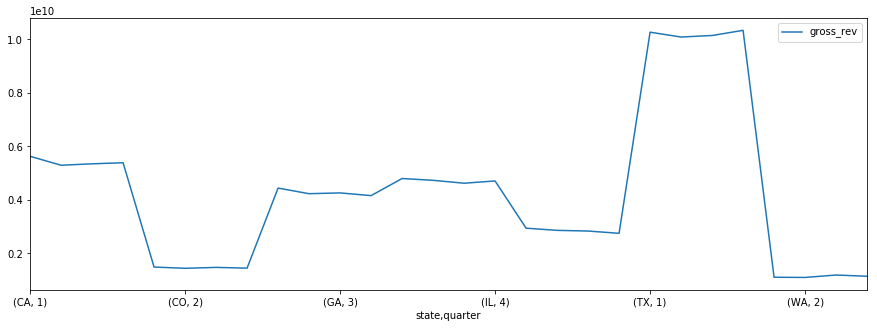

In [734]:
# Aggregating Revenue by Location Number and Quarter, and Visualizing the results

quarterly_rev_loc = retail_df.groupby(['state', 'quarter'], as_index=True).sum()[['gross_rev']]
quarterly_rev_loc
quarterly_rev_loc.plot(kind='line', figsize=(15,5))

In [277]:
owned = retail_df[retail_df['owned'] == 1]['profit']
owned.head()

24    6.72e+06
25    5.74e+06
26    8.68e+06
27    5.47e+06
28    5.71e+06
Name: profit, dtype: float64

In [278]:
leased = retail_df[retail_df['owned'] == 0]['profit']
leased.head()

0    1.48e+07
1    1.20e+07
2    2.01e+07
3    1.28e+07
4    7.94e+06
Name: profit, dtype: float64

In [240]:
month = retail_df['month'].unique

# Part 2 - Cleaning the Data

### You will have noticed that the company operates both owned and leased locations. This creates an apples-to-oranges comparison, as only the leased locations are burdened with rental cost. To prep your data for analysis, please impute an appropriate rental cost for each owned location and recalculate the rent-adjusted annual profit margin.

In [651]:
# Viewing Gross Revenue by Owned or Leased, and Location Num

profit_owned_state = pysqldf("SELECT owned, location_num, SUM(gross_rev) AS gross_rev FROM retail_df GROUP BY owned, location_num ORDER BY location_num ASC, SUM(gross_rev) DESC")
profit_owned_state.head()

,owned,location_num,gross_rev
0,0,1,544738868.630
1,0,2,355973012.710
2,1,3,331771805.460
3,0,4,263984311.310
4,0,5,189001593.490


In [652]:
retail_df.head()

,location_num,month,state,gross_rev,fixed_cost,variable_cost,rental_cost,num_of_prod,owned,profit,quarter
0,1,1,TX,48628171.020,9218156.690,24278189.230,365880,4452,0,14765945.100,1
1,1,2,TX,48107179.240,10587747.350,25116844.410,365880,4452,0,12036707.480,1
2,1,3,TX,64352278.290,10193873.770,33703499.830,365880,4452,0,20089024.690,1
3,1,4,TX,45943677.960,8764165.000,24037719.470,365880,4452,0,12775913.490,2
4,1,5,TX,32761434.980,8022116.430,16432119.180,365880,4452,0,7941319.370,2


In [614]:
# One-hot encoding for State column
dum = pd.get_dummies(retail_df['state'])

ml_df = pd.concat([dum, retail_df], axis=1, sort=False)
ml_df.head()

,CA,CO,GA,IL,NJ,TX,WA,location_num,month,state,gross_rev,fixed_cost,variable_cost,rental_cost,num_of_prod,owned,profit,quarter
0,0,0,0,0,0,1,0,1,1,TX,48628171.020,9218156.690,24278189.230,365880,4452,0,14765945.100,1
1,0,0,0,0,0,1,0,1,2,TX,48107179.240,10587747.350,25116844.410,365880,4452,0,12036707.480,1
2,0,0,0,0,0,1,0,1,3,TX,64352278.290,10193873.770,33703499.830,365880,4452,0,20089024.690,1
3,0,0,0,0,0,1,0,1,4,TX,45943677.960,8764165.000,24037719.470,365880,4452,0,12775913.490,2
4,0,0,0,0,0,1,0,1,5,TX,32761434.980,8022116.430,16432119.180,365880,4452,0,7941319.370,2


In [628]:
ml_df_clean = ml_df.drop(['state'], axis=1)
X = ml_df_clean.drop(['rental_cost'], axis=1).values
y = ml_df_clean['rental_cost'].values
print("The training dataset has {} examples and {} features.".format(X.shape[0], X.shape[1]))

The training dataset has 3996 examples and 16 features.


In [710]:
# splitting dataset the right way
    
y = ml_df_clean.rental_cost
X = ml_df_clean.drop('rental_cost', axis=1)

In [711]:
# create training and testing vars

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
print("\nX_train:\n")
print(X_train.head())
print(X_train.shape)

print("\nX_test:\n")
print(X_test.head())
print(X_test.shape)


X_train:

      CA  CO  GA  IL  NJ  TX  WA  location_num  month    gross_rev  \
1084   0   0   0   0   0   1   0            91      5 21158149.330   
1295   0   0   0   0   1   0   0           108     12 25134476.620   
1306   0   0   0   0   0   1   0           109     11 27809608.290   
312    0   0   0   1   0   0   0            27      1 13962429.750   
2465   0   0   1   0   0   0   0           206      6 23625188.580   

      fixed_cost  variable_cost  num_of_prod  owned      profit  quarter  
1084 4420348.530   10011263.820         4583      0 6543926.980        2  
1295 5299873.690   14398330.870         4435      0 5194682.060        4  
1306 5527581.670   14443812.380         4578      0 7702194.240        4  
312  4221586.290    7222314.420         4480      0 2389839.040        1  
2465 5455158.280   14038136.250         4489      0 4042534.050        2  
(3196, 16)

X_test:

      CA  CO  GA  IL  NJ  TX  WA  location_num  month    gross_rev  \
154    0   0   1   0   0   

In [712]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [713]:
print(X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(3196, 16) (3196,)
(800, 16) (800,)


Text(0, 0.5, 'Predictions')

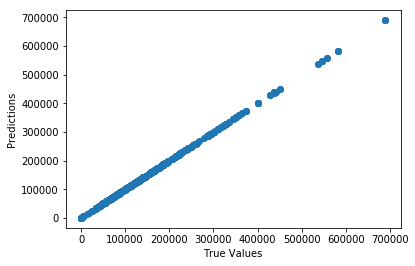

In [714]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [715]:
print('Score:', model.score(X_test, y_test))

Score: 1.0


# Part 3 

### With the data now cleaned, please identify factors that have led to historical outperformance across locations. The CEO is principally focused on maximizing profit margin at each location. There is no single correct answer for this section. We are more interested in your problem-solving process than any singular answer.

In [472]:
df_train = ml_df[['location_num', 'month', 'CA', 'CO', 'GA', 'IL', 'NJ', 'TX', 'WA', 'gross_rev', 'fixed_cost', 'num_of_prod', 'owned', 'profit', 'quarter_new']]

df_test = ml_df['rental_cost']

In [740]:
# Feature Importance

from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(df_train, df_test)
# display the relative importance of each attribute
rel_imp = model.feature_importances_
print(rel_imp)

/Users/utsav/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.26636456 0.02335031 0.00959423 0.00745892 0.00671098 0.01035329
 0.00823893 0.00866205 0.00741432 0.10199534 0.1040029  0.2586701
 0.08726181 0.08716766 0.01275462]
